In [ ]:
#I do not have a device with gpu and was not able to run locally. I uploaded to github in private repo and then cloned.

In [1]:
!git clone https://github.com/mcropper14/cvhw3.git

Cloning into 'cvhw3'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 70 (delta 1), reused 67 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 5.74 MiB | 38.45 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
%cd cvhw3/hw3_semantic_segmentation/

/content/cvhw3/hw3_semantic_segmentation


In [3]:
!pip -q install tqdm matplotlib pillow

In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=efd31b2c119c7c861a000f02f9c815023aacac69fb419de7b1bee38790dc0eb5
  Stored in directory: /root/.cache/pip/wheels/37/6c/38/64eeaa310e325aacda723e6df1f79ab5e9f31ba195264e04a8
Successfully built visdom


In [7]:
%cd cvhw3/hw3_semantic_segmentation

[Errno 2] No such file or directory: 'cvhw3/hw3_semantic_segmentation'
/content/cvhw3/hw3_semantic_segmentation


In [8]:
!ls

datasets			   main.py  README.md
deeplab_debug.py		   metrics  requirements.txt
Fall_2025__18794___Homework_3.zip  network  utils


In [9]:
%cd datasets/

/content/cvhw3/hw3_semantic_segmentation/datasets


In [10]:
!ls

__init__.py  test_loader.py  voc_one_per_class_pairs.png
__pycache__  utils.py	     voc.py


In [11]:
!mkdir data

In [12]:
!wget -q https://dataset.bj.bcebos.com/voc/VOCtrainval_11-May-2012.tar

In [18]:
!ls

cvhw3  data  sample_data  VOCdevkit  VOCtrainval_11-May-2012.tar


In [13]:
!tar -xf VOCtrainval_11-May-2012.tar

In [14]:
%cd /content/cvhw3/hw3_semantic_segmentation
!pwd
!ls

/content/cvhw3/hw3_semantic_segmentation
/content/cvhw3/hw3_semantic_segmentation
datasets			   main.py  README.md
deeplab_debug.py		   metrics  requirements.txt
Fall_2025__18794___Homework_3.zip  network  utils


In [18]:
!ls

datasets			   main.py  README.md
deeplab_debug.py		   metrics  requirements.txt
Fall_2025__18794___Homework_3.zip  network  utils


In [19]:
%cd datasets/data/
!ls

/content/cvhw3/hw3_semantic_segmentation/datasets/data
VOCdevkit


In [20]:
%cd /content/cvhw3/hw3_semantic_segmentation
!pwd
!ls

/content/cvhw3/hw3_semantic_segmentation
/content/cvhw3/hw3_semantic_segmentation
datasets			   main.py  README.md
deeplab_debug.py		   metrics  requirements.txt
Fall_2025__18794___Homework_3.zip  network  utils


In [27]:
!python main.py   --data_root ./datasets/data   --model deeplabv3plus_resnet50   --output_stride 16   --lr 0.01   --total_itrs 5000   --batch_size 8   --val_batch_size 4   --crop_size 513   --loss_type cross_entropy   --gpu_id 0

Device: cuda
Dataset: VOC, Train set: 1464, Val set: 1449
set up model
[!] Retrain
Start training, total itrs: 5000
inside of training loop
Epoch 1, Itrs 10/5000, Loss=2.140054
Epoch 1, Itrs 20/5000, Loss=1.256458
Epoch 1, Itrs 30/5000, Loss=0.831592
Epoch 1, Itrs 40/5000, Loss=0.801959
Epoch 1, Itrs 50/5000, Loss=0.877274
Epoch 1, Itrs 60/5000, Loss=0.710160
Epoch 1, Itrs 70/5000, Loss=0.614569
Epoch 1, Itrs 80/5000, Loss=0.530775
Epoch 1, Itrs 90/5000, Loss=0.619714
Epoch 1, Itrs 100/5000, Loss=0.622791
Epoch 1, Itrs 110/5000, Loss=0.567116
Epoch 1, Itrs 120/5000, Loss=0.718815
Epoch 1, Itrs 130/5000, Loss=0.596523
Epoch 1, Itrs 140/5000, Loss=0.673850
Epoch 1, Itrs 150/5000, Loss=0.533855
Epoch 1, Itrs 160/5000, Loss=0.509141
Epoch 1, Itrs 170/5000, Loss=0.415579
Epoch 1, Itrs 180/5000, Loss=0.438210
Model saved as checkpoints/latest_deeplabv3plus_resnet50_VOC_os16.pth
validation...
1449it [01:01, 23.51it/s]

Overall Acc: 0.835921
Mean Acc: 0.629545
FreqW Acc: 0.738153
Mean IoU: 0.4

Saved plot to results/miou_over_epochs_from_ckpt.png


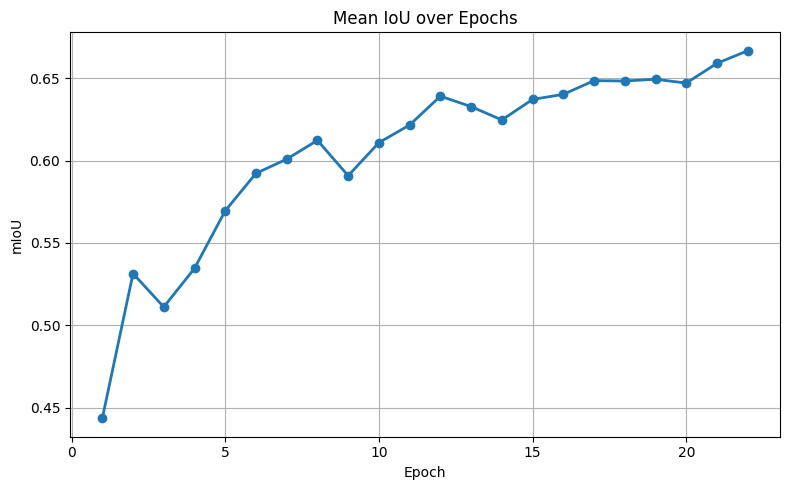

In [31]:
import os, torch, matplotlib.pyplot as plt

ckpt_path = "/content/cvhw3/hw3_semantic_segmentation/checkpoints/best_deeplabv3plus_resnet50_VOC_os16.pth"

ckpt = torch.load(ckpt_path, map_location="cpu", weights_only=False)

miou_hist = ckpt.get("mIoU_per_epoch", None)
if miou_hist is None:
    raise ValueError("it didn't save")

epochs = list(range(1, len(miou_hist) + 1))

plt.figure(figsize=(8,5))
plt.plot(epochs, miou_hist, marker='o', linewidth=2)
plt.title("Mean IoU over Epochs")
plt.xlabel("Epoch"); plt.ylabel("mIoU")
plt.grid(True); plt.tight_layout()
os.makedirs("results", exist_ok=True)
out_path = "results/miou.png"
plt.savefig(out_path, dpi=150)
print(f"Saved plot to {out_path}")



In [41]:
!python main.py \
  --data_root ./datasets/data \
  --model deeplabv3plus_resnet50 \
  --output_stride 16 \
  --val_batch_size 1 \
  --test_only \
  --ckpt checkpoints/bestdp_deeplabv3plus_resnet50_VOC_os16.pth \
  --save_val_results

Device: cuda
Dataset: VOC, Train set: 1464, Val set: 1449
set up model
Model restored from checkpoints/bestdp_deeplabv3plus_resnet50_VOC_os16.pth
548it [03:11,  2.86it/s]
Traceback (most recent call last):
  File "/content/cvhw3/hw3_semantic_segmentation/main.py", line 416, in <module>
    main()
  File "/content/cvhw3/hw3_semantic_segmentation/main.py", line 327, in main
    val_score, ret_samples = validate(
                             ^^^^^^^^^
  File "/content/cvhw3/hw3_semantic_segmentation/main.py", line 142, in validate
    preds = outputs.detach().max(dim=1)[1].cpu().numpy()
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


In [ ]:
#retrain with different loss function

In [39]:
!python main.py   --data_root ./datasets/data   --model deeplabv3plus_resnet50   --output_stride 16   --lr 0.01   --total_itrs 5000   --batch_size 8   --val_batch_size 4   --crop_size 513   --gpu_id 0

Device: cuda
Dataset: VOC, Train set: 1464, Val set: 1449
set up model
[!] Retrain
Start training, total itrs: 5000
inside of training loop
Epoch 1, Itrs 10/5000, Loss=1.100251
Epoch 1, Itrs 20/5000, Loss=0.796914
Epoch 1, Itrs 30/5000, Loss=0.428139
Epoch 1, Itrs 40/5000, Loss=0.437000
Epoch 1, Itrs 50/5000, Loss=0.558709
Epoch 1, Itrs 60/5000, Loss=0.408721
Epoch 1, Itrs 70/5000, Loss=0.341785
Epoch 1, Itrs 80/5000, Loss=0.302884
Epoch 1, Itrs 90/5000, Loss=0.381504
Epoch 1, Itrs 100/5000, Loss=0.373268
Epoch 1, Itrs 110/5000, Loss=0.261253
Epoch 1, Itrs 120/5000, Loss=0.423608
Epoch 1, Itrs 130/5000, Loss=0.346907
Epoch 1, Itrs 140/5000, Loss=0.317610
Epoch 1, Itrs 150/5000, Loss=0.282369
Epoch 1, Itrs 160/5000, Loss=0.242183
Epoch 1, Itrs 170/5000, Loss=0.191439
Epoch 1, Itrs 180/5000, Loss=0.217883
Model saved as checkpoints/latest_deeplabv3plus_resnet50_VOC_os16.pth
validation...
1449it [01:03, 22.84it/s]

Overall Acc: 0.642439
Mean Acc: 0.742567
FreqW Acc: 0.530496
Mean IoU: 0.3

Saved plot to results2/miou2.png


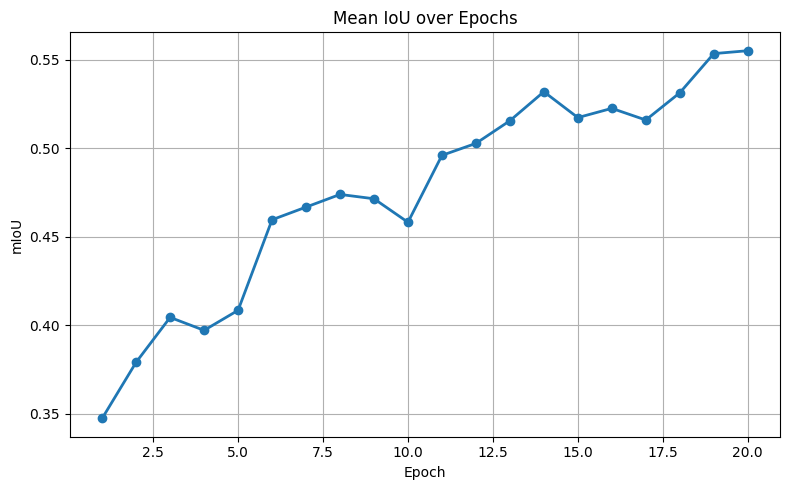

In [46]:
import os, torch, matplotlib.pyplot as plt

ckpt_path = "/content/cvhw3/hw3_semantic_segmentation/checkpoints/best_deeplabv3plus_resnet50_VOC_os16.pth"

ckpt = torch.load(ckpt_path, map_location="cpu", weights_only=False)

miou_hist = ckpt.get("mIoU_per_epoch", None)
if miou_hist is None:
    raise ValueError("it didn't save")

epochs = list(range(1, len(miou_hist) + 1))

plt.figure(figsize=(8,5))
plt.plot(epochs, miou_hist, marker='o', linewidth=2)
plt.title("Mean IoU over Epochs")
plt.xlabel("Epoch"); plt.ylabel("mIoU")
plt.grid(True); plt.tight_layout()
os.makedirs("results", exist_ok=True)
out_path = "results2/miou2.png"
plt.savefig(out_path, dpi=150)
print(f"Saved plot to {out_path}")


In [ ]:
#What loss function do you propose to use and why?

In [ ]:
#te that you are allowed to use torch.nn functions/modules,but you should add something beyond what is already implemented by torch.nn

In [ ]:
#need to deal with class imbalances

In [ ]:
"""
For the trained models, report the best performances in terms
of mIoU and accuracy for both models, and pick 5 images in problem 1, show
the ground-truth vs both models’ predictions side-by-side. There should be 4
columns, | RGB Image | Ground Truth Annotation | Model1 Prediction | Model2
Prediction | """

In [ ]:
model_1_ckpt = "/content/cvhw3/hw3_semantic_segmentation/checkpoints/best_deeplabv3plus_resnet50_VOC_os16.pth"

In [44]:
!python eval.py \
  --data_root ./datasets/data \
  --model1 deeplabv3plus_resnet50 \
  --ckpt1 checkpoints/bestdp_deeplabv3plus_resnet50_VOC_os16.pth \
  --model2 deeplabv3plus_resnet50 \
  --ckpt2 checkpoints/best_deeplabv3plus_resnet50_VOC_os16.pth \
  --output_stride 16 \
  --val_batch_size 1 \
  --num_images 5 \
  --out_grid results2/compare_grid.png

Device: cuda
Val set size: 1449
[deeplabv3plus_resnet50] mIoU=0.6667, Acc=0.9155
[deeplabv3plus_resnet50] mIoU=0.5550, Acc=0.8479
[Saved] results2/compare_grid.png


In [ ]:
#Sam

In [ ]:
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision==0.23.0

In [ ]:
!mkdir -p {HOME}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

In [ ]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint="/content/weights/sam_vit_h_4b8939.pth").to(device=DEVICE)

In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
#generate masks
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)